In [97]:
import yfinance as yf
import keras.backend as K
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, mean_squared_error,mean_absolute_percentage_error,r2_score
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM,Dropout, BatchNormalization, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras.models import Sequential
from keras.optimizer_v2.adam import Adam
from keras.optimizer_v2.rmsprop import RMSprop
import talib
from tensorflow.keras import layers
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline

In [98]:
# linear_model = tf.keras.Sequential([
#     layers.Dense(units=1)
# ])
linear_model = LinearRegression()

In [99]:
# linear_model.compile(
#     optimizer=tf.optimizers.Adam(learning_rate=0.1),
#     loss='mean_absolute_error')


In [101]:
data = yf.download('0005.hk')
data.head()

[*********************100%***********************]  1 of 1 completed


Open   High     Low  Close  Adj Close    Volume
Date                                                        
2000-01-03  111.0  111.5  107.50  108.0  55.387066   3908164
2000-01-04  106.0  106.5  105.00  106.0  54.361389   6895378
2000-01-05  101.0  102.0   99.50  100.5  51.540737  14657098
2000-01-06  101.0  102.0   96.25   97.0  49.745808  10632084
2000-01-07   98.5  101.0   97.50  100.5  51.540737   8368286

In [102]:

data['6day MA'] = data['Close'].rolling(window = 6).mean()
data['12day MA'] = data['Close'].rolling(window = 12).mean()
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
data['EMA12']=talib.EMA(data['Close'], timeperiod=12)
data['MACD']=macd
data['TR']=talib.TRANGE(data['High'],data['Low'],data['Close'])

data

Open        High         Low       Close  Adj Close  \
Date                                                                    
2000-01-03  111.000000  111.500000  107.500000  108.000000  55.387066   
2000-01-04  106.000000  106.500000  105.000000  106.000000  54.361389   
2000-01-05  101.000000  102.000000   99.500000  100.500000  51.540737   
2000-01-06  101.000000  102.000000   96.250000   97.000000  49.745808   
2000-01-07   98.500000  101.000000   97.500000  100.500000  51.540737   
...                ...         ...         ...         ...        ...   
2022-02-28   55.700001   55.700001   53.799999   54.099998  54.099998   
2022-03-01   54.049999   54.150002   53.200001   54.000000  54.000000   
2022-03-02   52.099998   52.299999   50.849998   51.200001  51.200001   
2022-03-03   52.599998   53.400002   52.049999   53.299999  53.299999   
2022-03-04   50.900002   51.849998   50.900002   51.500000  51.500000   

              Volume  Next Day Price  
Date                                  
2000-01-03   3908164      106.000000  
2000-01-04   6895378      100.500000  
2000-01-05  14657098       97.000000  
2000-01-06  10632084      100.500000  
2000-01-07   8368286      100.000000  
...              ...             ...  
2022-02-28  37535471       54.000000  
2022-03-01  16963545       51.200001  
2022-03-02  45247755       53.299999  
2022-03-03  29710818       51.500000  
2022-03-04  63019166             NaN  

[5544 rows x 7 columns]

In [103]:
# Split the data into train and test with 90 & 10 % respectively
X=data.drop(['Next Day Price','Adj Close'],1).values
y=data['Adj Close'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
y_test

/tmp/ipykernel_9225/1759410263.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=data.drop(['Next Day Price','Adj Close'],1).values


array([63.79550552, 62.99279022, 62.6547966 , ..., 51.20000076,
       53.29999924, 51.5       ])

In [104]:
linear_model.fit(
    X_train,
    y_train)


LinearRegression()

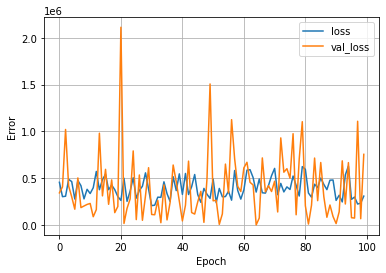

In [105]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)


In [106]:
y_pred=linear_model.predict(X_test)

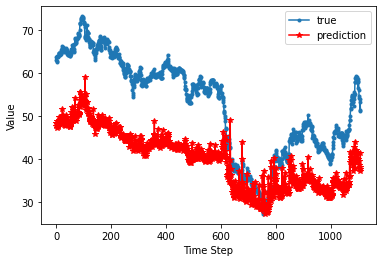

In [107]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r',marker='*', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()

In [108]:
mean_squared_error(y_test,y_pred,squared=False)

13.725097533017534

In [109]:
mean_absolute_percentage_error(y_test,y_pred)

0.23052670778143175

In [110]:
r2_score(y_test,y_pred)

-0.47990803778178215